In [20]:
import pandas as pd
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open ("/srv/data/enemy-christ/large-data/grouped_df.pkl", "rb") as f:
    grouped = pickle.load(f)

/tmp/ipykernel_3113726/57775235.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  grouped = pickle.load(f)


In [4]:
# filter out gnt
grouped = grouped[~grouped["sentence_id"].str.startswith("lagt_tlg0031")]

In [5]:
grouped_polemical = pd.read_parquet("../data/large-data/grouped_polemical.parquet")

In [11]:
centuries = [(n, n+99) for n in range(1,600,100)]
centuries

[(1, 100), (101, 200), (201, 300), (301, 400), (401, 500), (501, 600)]

In [15]:
# Ensure numeric, and handle missing bounds (choose sensible defaults)
gb = grouped["not_before"].astype("float64").fillna(-1e9)
ga = grouped["not_after"].astype("float64").fillna( 1e9)

pb = grouped_polemical["not_before"].astype("float64").fillna(-1e9)
pa = grouped_polemical["not_after"].astype("float64").fillna( 1e9)

for a, b in centuries:
    label = f"{a}-{b}"
    # overlap: [start,end] intersects [a,b]  <=>  start <= b  AND  end >= a
    grouped[label] = (gb <= b) & (ga >= a)
    grouped_polemical.loc[:, label] = (pb <= b) & (pa >= a)


In [17]:
grouped.head(5)

,sentence_id,lamma_sentence,token_ids,title,author,lagt_provenience,not_before,not_after,sentence_text,tokens,enemy_subcorpus,1-100,101-200,201-300,301-400,401-500,501-600
0,lagt_ogl0001.ogl001_0,πινυτός ἀντίγραφον θαυμάζω ἀποδέχομαι διονύσιος,"[365056825, 365056826, 365056828, 365056831, 3...",De Epistola Pinyti ad Dionysium,Pinytus,christian,101.0,200.0,"πρὸς ἣν, ὁ Πινυτὸς ἀντιγράφων, θαυμάζει μὲν κ...","[{'lemma': 'πινυτός', 'token': 'Πινυτὸς', 'pos...",christian_0_300,False,True,False,False,False,False
1,lagt_ogl0001.ogl001_1,ἀντιπαρακαλέω σκληρός μεταδίδωμι τροφή τέλειος...,"[365056835, 365056837, 365056840, 365056841, 3...",De Epistola Pinyti ad Dionysium,Pinytus,christian,101.0,200.0,ἀντιπαρακαλεῖ δὲ στεῤῥοτέρας ἤδη ποτὲ μεταδιδό...,"[{'lemma': 'ἀντιπαρακαλέω', 'token': 'ἀντιπαρα...",christian_0_300,False,True,False,False,False,False
2,lagt_ogl0001.ogl001_2,ἐπιστολή πινυτός πίστις εὐσέβεια φροντίς ὑπήκο...,"[365056868, 365056872, 365056875, 365056876, 3...",De Epistola Pinyti ad Dionysium,Pinytus,christian,101.0,200.0,δι᾿ ἧς ἐπιστολῆς καὶ ἡ τοῦ Πινυτοῦ περὶ τὴν πί...,"[{'lemma': 'ἐπιστολή', 'token': 'ἐπιστολῆς', '...",christian_0_300,False,True,False,False,False,False
3,lagt_tlg0004.tlg001_0,φιλοσοφία ἔργον ἔνιοι φημί βάρβαρος ἄρχω,"[345704070, 345704071, 345704072, 345704073, 3...",Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,τὸ τῆς φιλοσοφίας ἔργον ἔνιοί φασιν ἀπὸ βαρβάρ...,"[{'lemma': 'φιλοσοφία', 'token': 'φιλοσοφίας',...",pagan_0_300,False,False,True,False,False,False
4,lagt_tlg0004.tlg001_1,γίγνομαι Πέρσης Μάγος Βαβυλώνιος Ἀσσύριος Χαλδ...,"[345704078, 345704082, 345704083, 345704087, 3...",Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,"γεγενῆσθαι γὰρ παρὰ μὲν Πέρσαις Μάγους, παρὰ δ...","[{'lemma': 'γίγνομαι', 'token': 'γεγενῆσθαι', ...",pagan_0_300,False,False,True,False,False,False


In [18]:
grouped_polemical.head(5)

,sentence_id,lamma_sentence,token_ids,title,author,lagt_provenience,not_before,not_after,sentence_text,tokens,...,pred_polemical,sim_row,polemical_cat_pred,polemical_cat_sim_score,1-100,101-200,201-300,301-400,401-500,501-600
0,lagt_tlg0004.tlg001_1005,πείθω Μεσσήνη ἁλίσκομαι,"[345716661, 345716663, 345716665]",Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,"καὶ τὸν μὴ πεισθῆναι, Μεσσήνην δὲ ἑαλωκέναι.","[{'char_end': 20, 'char_start': 11, 'lemma': '...",...,1,0,5,0.871103,False,False,True,False,False,False
1,lagt_tlg0004.tlg001_1019,ἀναδράω Ἐφέσιος φημί γίγνομαι Φερεκύδης Σύριος...,"[345716881, 345716884, 345716885, 345716887, 3...",Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,ἄνδρων δ ὁ Ἐφέσιός φησι δύο γεγονέναι Φερεκύδα...,"[{'char_end': 6, 'char_start': 0, 'lemma': 'ἀν...",...,1,1,1,0.908407,False,False,True,False,False,False
2,lagt_tlg0004.tlg001_1038,ἐπιστέλλω,[345717134],Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,καὶ ἐπέστειλεν ὧδε·,"[{'char_end': 14, 'char_start': 4, 'lemma': 'ἐ...",...,1,2,5,0.789246,False,False,True,False,False,False
3,lagt_tlg0004.tlg001_1065,φημί ἀείδω καταγελάω παιδάριον μανθάνω φημί ἀγ...,"[345717482, 345717483, 345717484, 345717486, 3...",Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,"τούτου φασὶν ᾅδοντος καταγελάσαι τὰ παιδάρια, ...","[{'char_end': 12, 'char_start': 7, 'lemma': 'φ...",...,1,3,1,0.901370,False,False,True,False,False,False
4,lagt_tlg0004.tlg001_1074,φιλόσοφος ἐπιστέλλω Θαλῆς Ἐξάμυος γῆρας οἴχομαι,"[345717603, 345717605, 345717607, 345717608, 3...",Βίοι καὶ γνῶμαι τῶν ἐν φιλοσοφίᾳ εὐδοκιμησάντων,Diogenes Laertius,pagan,222.0,235.0,οὗτος δὴ ὁ φιλόσοφος καὶ ἐπέστειλεν ὧδε Θαλῆς ...,"[{'char_end': 20, 'char_start': 11, 'lemma': '...",...,1,4,1,0.899080,False,False,True,False,False,False


In [19]:
class_names_map = {
    -1: "unpolemical",
     1: "heresy/idolatry/etc.",
     2: "hypocrisy/falsehood",
     3: "arrogance/envy",
     4: "moral depravity/excess",
     5: "strife/violence",
     6: "dubious figures/foreignness",
     7: "general"
}

In [24]:
grouped_polemical.columns

Index(['sentence_id', 'lamma_sentence', 'token_ids', 'title', 'author',
       'lagt_provenience', 'not_before', 'not_after', 'sentence_text',
       'tokens', 'enemy_subcorpus', 'prob_polemical', 'pred_polemical',
       'sim_row', 'polemical_cat_pred', 'polemical_cat_sim_score', '1-100',
       '101-200', '201-300', '301-400', '401-500', '501-600'],
      dtype='object')

In [27]:
sum(grouped_polemical[grouped_polemical["polemical_cat_sim_score"]>0.9])

KeyboardInterrupt: 

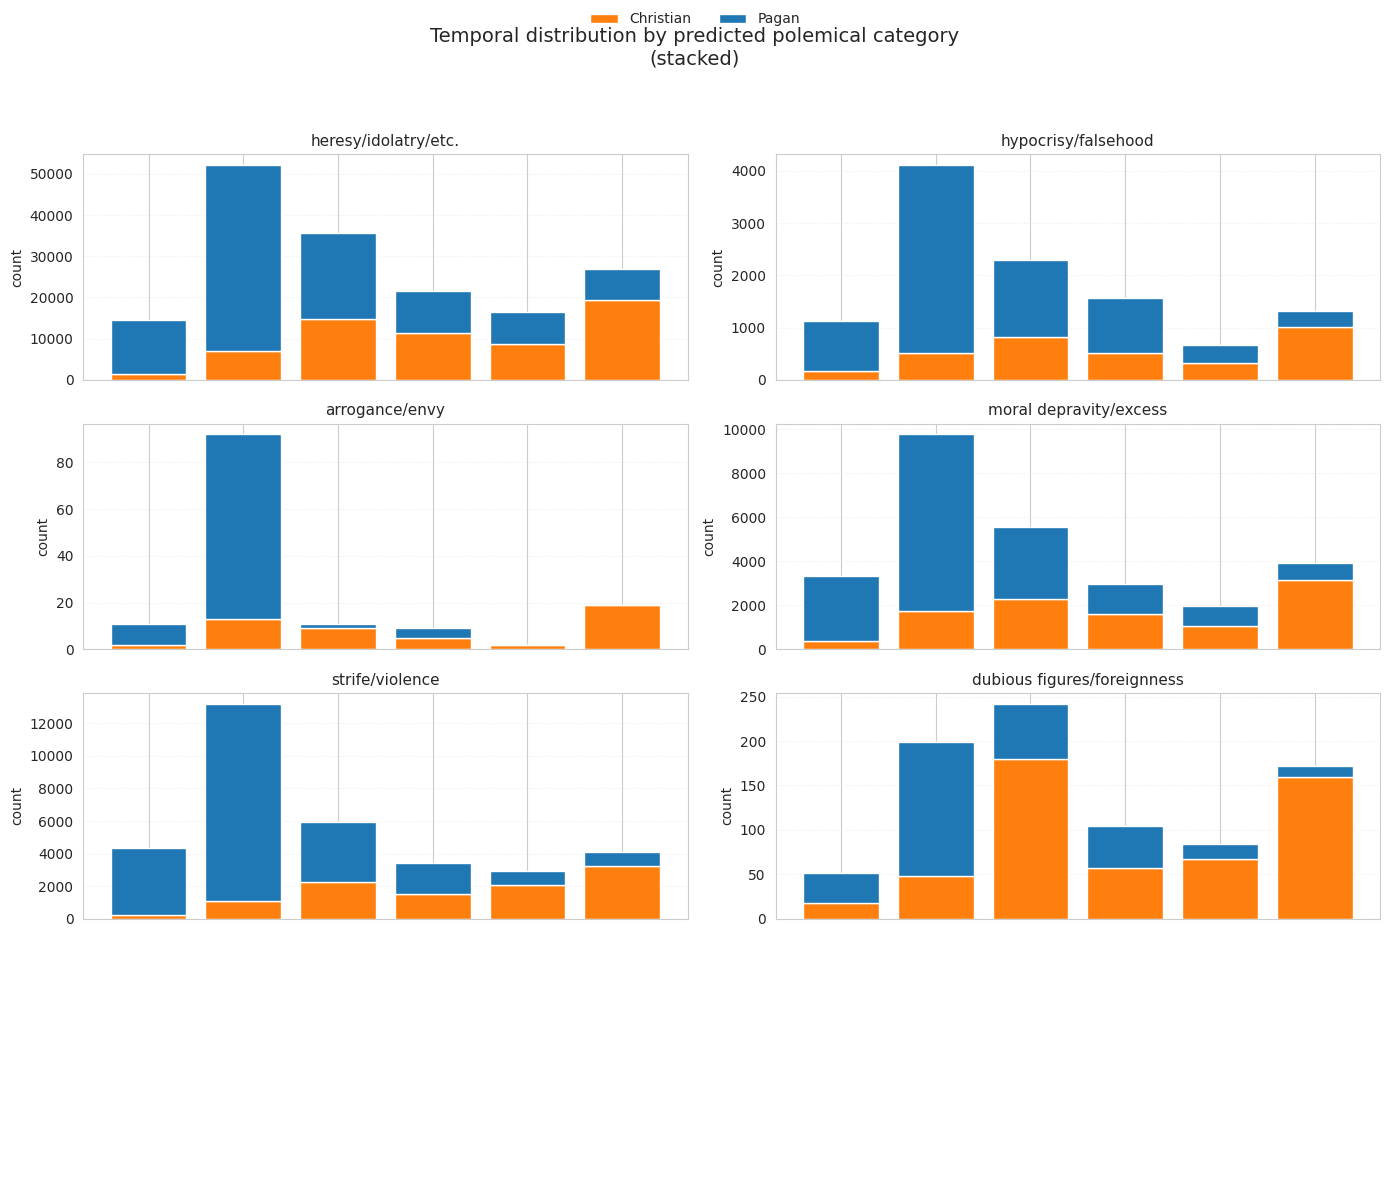

In [26]:
# century columns you created earlier, e.g. "1-100", "101-200", ...
century_cols = [c for c in grouped_polemical.columns if re.fullmatch(r"\d+-\d+", c)]
century_cols = sorted(century_cols, key=lambda s: int(s.split("-")[0]))  # sort by start year

cats   = [1,2,3,4,5,6]
provs  = ["christian", "pagan"]
colors = {"pagan": "#1f77b4", "christian": "#ff7f0e"}  # tweak as you like

# Settings
mode = "stacked"          # "stacked" or "grouped"
normalize = False         # if True and mode="stacked": stack heights sum to 1 per century

# Precompute counts[cat][prov] -> list per century
counts = {}
for cat in cats:
    counts[cat] = {}
    for prov in provs:
        per_cent = []
        cat_mask  = (grouped_polemical["polemical_cat_pred"] == cat)
        prov_mask = (grouped_polemical["lagt_provenience"] == prov)
        for col in century_cols:
            per_cent.append(int((cat_mask & prov_mask & grouped_polemical[col]).sum()))
        counts[cat][prov] = np.array(per_cent, dtype=float)

# Optional normalization (only makes sense for stacked)
if normalize and mode == "stacked":
    for cat in cats:
        total = counts[cat]["christian"] + counts[cat]["pagan"]
        total[total == 0] = 1.0  # avoid div-by-zero
        counts[cat]["christian"] = counts[cat]["christian"] / total
        counts[cat]["pagan"]     = counts[cat]["pagan"]     / total

# Shared y-limit across plots (use totals if stacked, max per bar if grouped)
if mode == "stacked":
    global_max = max((counts[c]["christian"] + counts[c]["pagan"]).max() for c in cats)
else:
    global_max = max(max(counts[c][p].max() for p in provs) for c in cats)
ylim = (0, (1.0 if (normalize and mode=="stacked") else global_max*1.1) or 1)

# Plot: 4x2 grid (last cell hidden)
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 12), sharex=True)
axes = axes.ravel()

x = np.arange(len(century_cols))
barw = 0.38  # for grouped

for i, cat in enumerate(cats):
    ax = axes[i]
    if mode == "stacked":
        ax.bar(x, counts[cat]["christian"], label="Christian", color=colors["christian"])
        ax.bar(x, counts[cat]["pagan"], bottom=counts[cat]["christian"], label="Pagan", color=colors["pagan"])
        ax.set_ylabel("share" if normalize else "count")
    else:  # grouped
        ax.bar(x - barw/2, counts[cat]["christian"], width=barw, label="Christian", color=colors["christian"])
        ax.bar(x + barw/2, counts[cat]["pagan"],     width=barw, label="Pagan",     color=colors["pagan"])
        ax.set_ylabel("count")

    ax.set_title(class_names_map.get(cat, str(cat)), fontsize=11)
    #ax.set_ylim(*ylim)
    ax.grid(axis="y", linestyle=":", alpha=0.35)
    ax.set_xticks(x, century_cols, rotation=45, ha="right")

# Legend once
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=False)

# Hide any unused subplot
if len(cats) < rows*cols:
    for j in range(len(cats), rows*cols):
        axes[j].axis("off")

fig.suptitle(
    f"Temporal distribution by predicted polemical category\n"
    f"{'(stacked, normalized)' if (mode=='stacked' and normalize) else '('+mode+')'}",
    fontsize=14, y=0.98
)
fig.tight_layout(rect=[0,0,1,0.95])
plt.show()

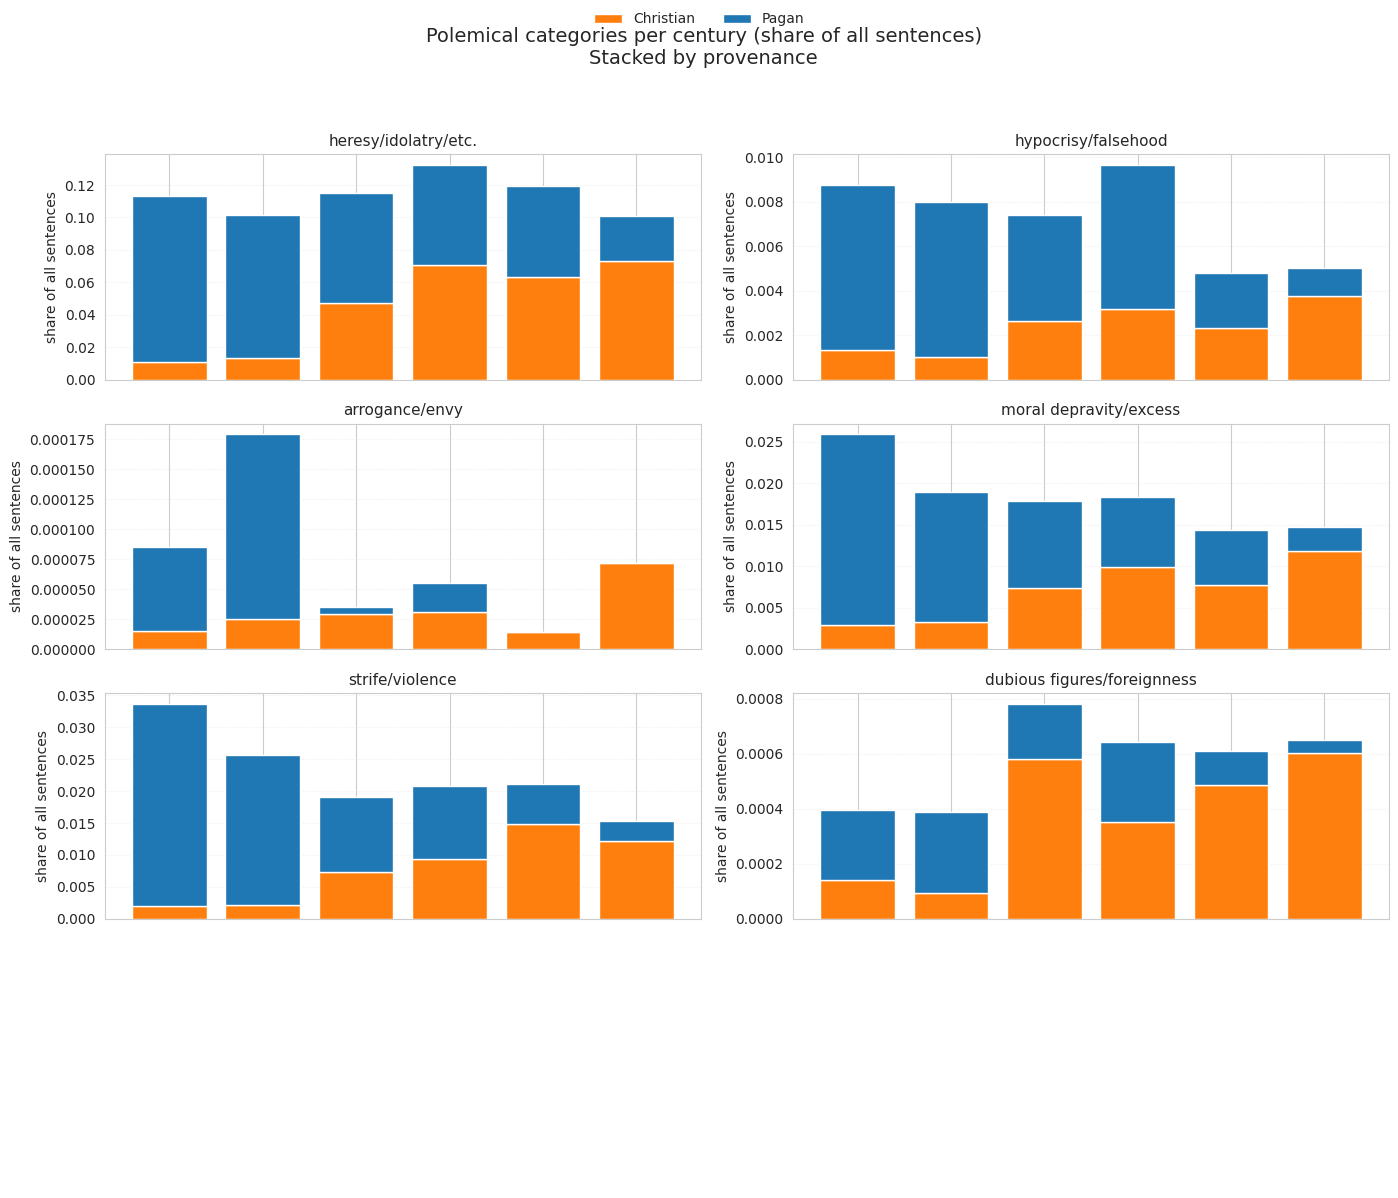

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import re

# ----- columns & sets -----
century_cols = [c for c in grouped.columns if re.fullmatch(r"\d+-\d+", c)]
century_cols = sorted(century_cols, key=lambda s: int(s.split("-")[0]))

cats   = [1,2,3,4,5,6]                # add 7 if you want "general"
provs  = ["christian", "pagan"]
colors = {"pagan": "#1f77b4", "christian": "#ff7f0e"}

mode = "stacked"                      # "stacked" or "grouped"
normalize_by_total = True            # << key switch: normalize by ALL sentences per century

# ----- denominator: ALL sentences per century (from grouped) -----
# These columns are booleans; sum() counts rows in that century.
denom = np.array([grouped[col].sum() for col in century_cols], dtype=float)
denom_safe = denom.copy()
denom_safe[denom_safe == 0] = np.nan   # avoid div-by-zero

# ----- numerator: counts per cat+prov+century (from grouped_polemical) -----
counts = {}
for cat in cats:
    counts[cat] = {}
    cat_mask = (grouped_polemical["polemical_cat_pred"] == cat)
    for prov in provs:
        prov_mask = (grouped_polemical["lagt_provenience"] == prov)
        per_cent = []
        for col in century_cols:
            per_cent.append(int((cat_mask & prov_mask & grouped_polemical[col]).sum()))
        counts[cat][prov] = np.array(per_cent, dtype=float)

# ----- optionally convert to shares of ALL sentences in that century -----
if normalize_by_total:
    for cat in cats:
        for prov in provs:
            counts[cat][prov] = counts[cat][prov] / denom_safe  # elementwise; may yield NaN where denom=0

# ----- y-limit -----
if mode == "stacked":
    global_max = np.nanmax([(counts[c]["christian"] + counts[c]["pagan"]).max() for c in cats])
else:
    global_max = np.nanmax([max(counts[c][p].max() for p in provs) for c in cats])
ylim = (0, (global_max if np.isfinite(global_max) else 1) * 1.1)

# ----- plot -----
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 12), sharex=True)
axes = axes.ravel()

x = np.arange(len(century_cols))
barw = 0.38

for i, cat in enumerate(cats):
    ax = axes[i]

    if mode == "stacked":
        ax.bar(x, counts[cat]["christian"], label="Christian", color=colors["christian"])
        ax.bar(x, counts[cat]["pagan"], bottom=counts[cat]["christian"], label="Pagan", color=colors["pagan"])
        ax.set_ylabel("share of all sentences")
    else:
        ax.bar(x - barw/2, counts[cat]["christian"], width=barw, label="Christian", color=colors["christian"])
        ax.bar(x + barw/2, counts[cat]["pagan"],     width=barw, label="Pagan",     color=colors["pagan"])
        ax.set_ylabel("share of all sentences" if normalize_by_total else "count")

    ax.set_title(class_names_map.get(cat, str(cat)), fontsize=11)
    #ax.set_ylim(*ylim)
    ax.grid(axis="y", linestyle=":", alpha=0.35)
    ax.set_xticks(x, century_cols, rotation=45, ha="right")

# one legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=False)

# hide unused panels
for j in range(len(cats), rows*cols):
    axes[j].axis("off")

fig.suptitle(
    "Polemical categories per century (share of all sentences)\n"
    f"{mode.capitalize()} by provenance",
    fontsize=14, y=0.98
)
fig.tight_layout(rect=[0,0,1,0.95])
plt.show()

In [30]:
fig.savefig("../figures/grouped-polemical-temporal.png")